<a href="https://colab.research.google.com/github/Neancence/Apam-Training/blob/main/Apam_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# DATADIR = "C:\Users\User\Desktop\Apam Lambung"

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


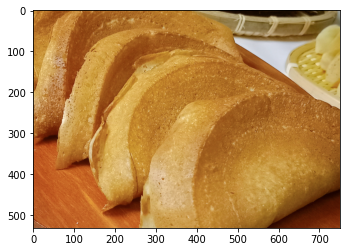

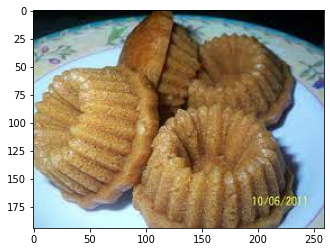

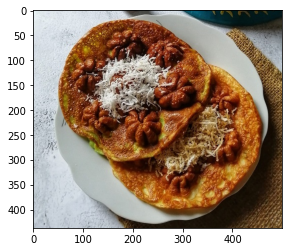

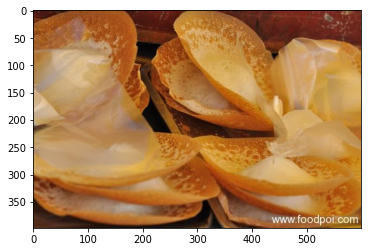

In [ ]:
DATADIR = "gdrive/MyDrive/Apam Image"

CATEGORIES = ["Apam balik", "Apam gula hangus", "Apam Lambung", "apam manis"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.cvtColor(cv2.imread(os.path.join(path,img)), cv2.COLOR_BGR2RGB)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [ ]:
print(img_array)

[[ 32  40  43 ...  51  54  57]
 [ 39  42  41 ...  56  59  62]
 [ 42  43  41 ...  62  65  67]
 ...
 [ 59  59  59 ... 140 138 136]
 [ 60  60  60 ... 136 133 131]
 [ 60  60  60 ... 135 134 133]]


In [ ]:
print(img_array.shape)

(398, 600)


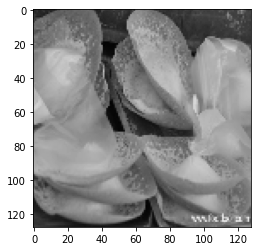

In [ ]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.cvtColor(cv2.imread(os.path.join(path,img)), cv2.COLOR_BGR2RGB)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print("")
print(len(training_data))

In [ ]:
import random

random.shuffle(training_data)

index = 1
for sample in training_data:
  print(str(index) + "->" + str(sample[1]))
  index = index + 1

In [ ]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)
X = X/255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def create_model():
  model = Sequential()

  model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(64))

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

#model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 256)     7168      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0

In [ ]:
history = model.fit(X, y, validation_split=0.3, epochs=10, batch_size=50,)

Epoch 1/10
3/3 [==============================] - 46s 15s/step - loss: -63.4796 - accuracy: 0.2700 - val_loss: -454.1550 - val_accuracy: 0.2333
Epoch 2/10
3/3 [==============================] - 44s 15s/step - loss: -806.5266 - accuracy: 0.2811 - val_loss: -2832.3252 - val_accuracy: 0.2333
Epoch 3/10
3/3 [==============================] - 44s 15s/step - loss: -3996.1110 - accuracy: 0.2561 - val_loss: -9794.4619 - val_accuracy: 0.2333
Epoch 4/10
3/3 [==============================] - 43s 15s/step - loss: -12238.2097 - accuracy: 0.2886 - val_loss: -25751.8398 - val_accuracy: 0.2333
Epoch 5/10
3/3 [==============================] - 43s 15s/step - loss: -30820.6118 - accuracy: 0.2611 - val_loss: -56902.8477 - val_accuracy: 0.2333
Epoch 6/10
3/3 [==============================] - 43s 15s/step - loss: -63827.4844 - accuracy: 0.2361 - val_loss: -111311.6562 - val_accuracy: 0.2333
Epoch 7/10
3/3 [==============================] - 43s 15s/step - loss: -124594.5469 - accuracy: 0.2536 - val_loss: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
history = model.evaluate(X, y, verbose=1)

8/8 [==============================] - 20s 2s/step - loss: -333.3729 - accuracy: 0.6040
